In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train),len(x_test)

(60000, 10000)

In [4]:
x_train[2226].shape

(28, 28)

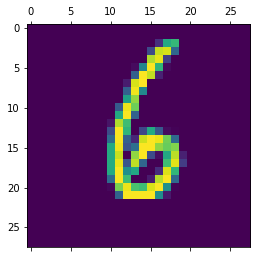

In [5]:
plt.matshow(x_train[2226]);

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='sigmoid')
])

model.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4203 - accuracy: 0.8791
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1680 - accuracy: 0.9524
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1203 - accuracy: 0.9656
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0955 - accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0769 - accuracy: 0.9773: 0s - loss: 0.074
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0633 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0522 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0437 - accuracy: 0.9869
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0370 - accuracy: 0.9887: 1s - loss: 0.0336 - accu
Epoch 10/10
1875/1875 [===============

In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 902us/step - loss: 0.0905 - accuracy: 0.9764


[0.09047967195510864, 0.9764000177383423]

In [9]:
y_pred = model.predict(x_test)

In [10]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [11]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_pred_label)

Text(69.0, 0.5, 'Actual')

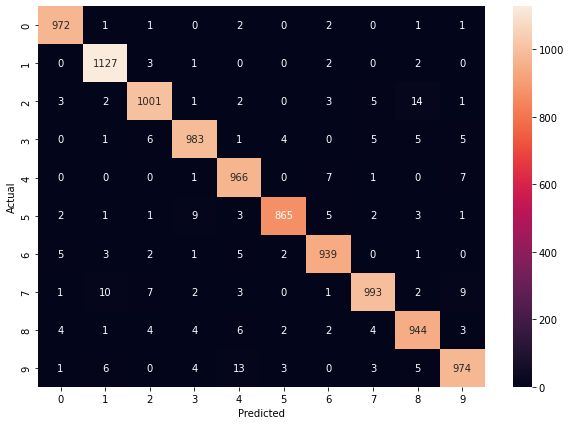

In [13]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual');